<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Razonamiento_Aproximado_The_tipping_problem_FzzLing_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing a decision Fuzzy System using the problem of deciding a tip at a restaurant
--------------------------------------------------------
**Dr. Mario Gongora** (mario@magscience.com)

Uses alternative programming techniques to implement the various steps:


*   Fuzzification
*   Rules
*   Aggregation
*   Defuzzification

It is possible to use direct linguistic variables as inputs.

Requires installing skfuzzy like so:

python3 -m pip install scikit-fuzzy


In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from random import seed
from random import random


Build the model
----------------------------
Start with the variables and
their membership functions.

Define all the variables and fuzzy sets explicitly, using 1000/2500 setps (100 higher resolution than the demo *tipping problem*) to allow for other experiments and any memebership function.


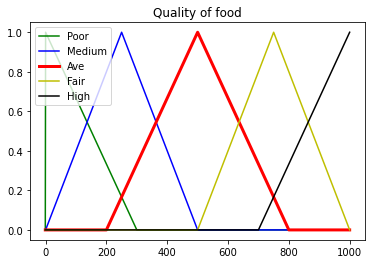

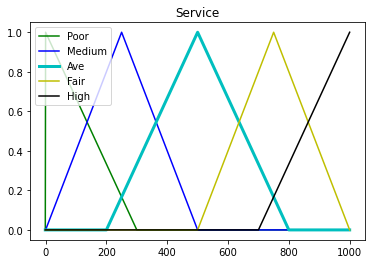

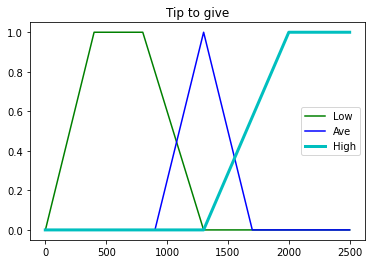

In [ ]:
# quality membership functions (antecedent)
mf_qual = np.arange(-1, 1001, 1)
q_poor = fuzz.trimf(mf_qual, [0, 0, 300])
q_mediocre = fuzz.trimf(mf_qual, [0, 250, 500])
q_average = fuzz.trimf(mf_qual, [200, 500, 800])
q_decent = fuzz.trimf(mf_qual, [500, 750, 1000])
q_good = fuzz.trimf(mf_qual, [700, 1000, 1001])


# service membership functions (antecedent)
mf_svc = np.arange(-1, 1001, 1)
s_poor = fuzz.trimf(mf_qual, [0, 0, 300])
s_mediocre = fuzz.trimf(mf_qual, [0, 250, 500])
s_average = fuzz.trimf(mf_qual, [200, 500, 800])
s_decent = fuzz.trimf(mf_qual, [500, 750, 1000])
s_good = fuzz.trimf(mf_qual, [700, 1000, 1001])


# Tip mebership functions (consequent)
mf_tip = np.arange(-1, 2501, 1)
t_low = fuzz.trapmf(mf_tip, [0, 400, 800, 1300])
t_average = fuzz.trimf(mf_tip, [900, 1300, 1700])
t_high = fuzz.trapmf(mf_tip, [1300, 2000, 2500, 2501])


# To see how these look with plot
plt.plot(mf_qual, q_poor, 'g', linewidth=1.5, label='Poor')
plt.plot(mf_qual, q_mediocre, 'b', linewidth=1.5, label='Medium')
plt.plot(mf_qual, q_average, 'r', linewidth=3, label='Ave')
plt.plot(mf_qual, q_decent, 'y', linewidth=1.5, label='Fair')
plt.plot(mf_qual, q_good, 'k', linewidth=1.5, label='High')
plt.title('Quality of food')
plt.legend()
plt.show()

plt.plot(mf_svc, s_poor, 'g', linewidth=1.5, label='Poor')
plt.plot(mf_svc, s_mediocre, 'b', linewidth=1.5, label='Medium')
plt.plot(mf_svc, s_average, 'c', linewidth=3, label='Ave')
plt.plot(mf_svc, s_decent, 'y', linewidth=1.5, label='Fair')
plt.plot(mf_svc, s_good, 'k', linewidth=1.5, label='High')
plt.title('Service')
plt.legend()
plt.show()

plt.plot(mf_tip, t_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_tip, t_average, 'b', linewidth=1.5, label='Ave')
plt.plot(mf_tip, t_high, 'c', linewidth=3, label='High')
plt.title('Tip to give')
plt.legend()
plt.show()


# Define the fuzzification functions for both input variables

Use the skfuzzy interpolation functions


*   **input:** numeric value for each variable: 1 crips float value (e.g. score for the qaility or service between 0-10)
*   **output:** array containing the fuzzified membership functions for the variable (array of 5 float values between 0-1, each correspoding to the degree of membership that the input value has on each fuzzy set in the corresponding variabel)



In [ ]:
#----------------------------------
# food Quality Fuzzy Sets fuzzification
def FuzzfyQual(qualVal):
# fzz_qual is the level of memebership of the input value for quality for the fuzzy sets
  fzz_qual = np.zeros(5)

  fzz_qual[0] = fuzz.interp_membership(mf_qual, q_poor, qualVal)
  fzz_qual[1] = fuzz.interp_membership(mf_qual, q_mediocre, qualVal)
  fzz_qual[2] = fuzz.interp_membership(mf_qual, q_average, qualVal)
  fzz_qual[3] = fuzz.interp_membership(mf_qual, q_decent, qualVal)
  fzz_qual[4] = fuzz.interp_membership(mf_qual, q_good, qualVal)

  return fzz_qual

#----------------------------------
# Service Fuzzy Sets fuzzification
def FuzzfySvc(svcVal):
# fzz_svc is the level of memebership of the input value for service for the fuzzy sets
  fzz_svc = np.zeros(5)

  fzz_svc[0] = fuzz.interp_membership(mf_svc, s_poor, svcVal)
  fzz_svc[1] = fuzz.interp_membership(mf_svc, s_mediocre, svcVal)
  fzz_svc[2] = fuzz.interp_membership(mf_svc, s_average, svcVal)
  fzz_svc[3] = fuzz.interp_membership(mf_svc, s_decent, svcVal)
  fzz_svc[4] = fuzz.interp_membership(mf_svc, s_good, svcVal)

  return fzz_svc

# Build the knowledge base
with fuzzy Rules

There are 25 possible rules (all ANDs), for the sake of completenes we could mention all, but not all need to be used.

We should use at least 3 though, to make sure all possible outputs are used... but even that may be not enough as can leave possible 0 area for defuzzifying for some combination of inpur values, thus give a runtime error.

If we allow OR and AND then there can be even more rules, although some mey be redundant.
* AND requires to choose the min of the degrees of membership.
* OR requires to choose the max of the degrees of membership.

Then return the max of all our MFs from those rules that fired.



*   **evalRules:** receives the [*fuzzyfied / directly entered*] degree of membership for each variable's functions (e.g. array of 5 floats between 0-1), applies the rules, and outputs the 3 *fired* values for each output variable MFs (e.g. array of 3 floats between 0-1)
*   **setOutMFs:** receives the 3 *fired* mebership values for each output variable MFs (e.g. array of 3 floats between 0-1), and outputs the clipped output variable MFs (array of 3 x MF (array of 2500 floats 0-1) for the tip).




In [ ]:
def evalRules(fuzzedQal, fuzzedSvc):
  # There are 25 possible rules!! No need to use all though...
  # min 3 but better more to avoid runtine error for possible combinations
  # of values that result on 0 area to defuzzify.

  # This variable will store the (3 in case of the tip) degrees of memebership resulting
  # from the firing rules.
  outVarS = np.zeros(3)

  # The part: min(fuzzedQal[0], fuzzedSvc[0]) chooses the minimum between the two degrees of mebership of the
  # antecedents which is equivalent of doing the AND operation between the two. If max() was used here instead
  # it would correspond to an OR connecting the antecedents in the rule.
  # Then store it in the corresponding consequent MF, unless it has alrady been set to a higher value from a previously
  # fired rule, chosen using the max() between the calculated value and the current value.
  outVarS[0] = max(outVarS[0], min(fuzzedQal[0], fuzzedSvc[0])) # rule1 if quality'poor' AND service'poor' then tip'low'
  outVarS[1] = max(outVarS[1], min(fuzzedQal[2], fuzzedSvc[2])) # rule2 if quality'average'] AND service'average', tip'medium'
  outVarS[2] = max(outVarS[2], min(fuzzedQal[4], fuzzedSvc[4])) # rule3 if service'good' AND quality'good', tip'high'
  outVarS[2] = max(outVarS[2], min(fuzzedQal[2], fuzzedSvc[3])) # rule4 if service'decent' AND quality'average', tip'high'

  return outVarS


def setOutMFs(outRuleVars):
  # take the "firing" level of each output (tip) memebership functions (3 of them)
  # and create the 3 mebership functions clipped at each corresponding value.

  # A lazy way of creating the clipping level! An array of the same size as a membership function
  # with a constant avlau at said level.
  t_low_max = np.full(np.shape(mf_tip),outRuleVars[0])
  t_ave_max = np.full(np.shape(mf_tip),outRuleVars[1])
  t_hig_max = np.full(np.shape(mf_tip),outRuleVars[2])

  # copy the MF from the original clipped by the level from above.
  t_out_low = np.fmin(t_low_max, t_low)
  t_out_ave = np.fmin(t_ave_max, t_average)
  t_out_hig = np.fmin(t_hig_max, t_high)

  # stack the 3 MFs in a single variable to return
  t_Out_mfs = np.stack((t_out_low, t_out_ave, t_out_hig))

  return t_Out_mfs


# Get Output MF combinations (agregated)



*   **execFzzedRules** evaluates the whole system using numeric inputs and fuzzification. Input the 2 float values of each input variable, e.g. score for quality and service between 0-1. Output, the tip, float 0-25.
*   **execLingRules** evaluates the whole system using linguistic variables with wheighed memebership functions (e.g. from a poll or data collation). Input the degrees of membership for each MF for each linguistic variable (e.g. 2 x 5 floats corresponding to the MFs for quality and servvice)

In [ ]:
def execFzzedRules(scroeQual, scoreSvc):

  # Fuzzyfy the 2 scores in each of its linguistic variables
  fzzedQal = FuzzfyQual(scroeQual)
  fzzedSvc = FuzzfySvc(scoreSvc)

  # Evalate the rules and get the resulting degrees of membership for the output MFs
  EvaledRs = evalRules(fzzedQal, fzzedSvc)
  outMFs = setOutMFs(EvaledRs)

  # Agregate the sets into a single one for defuzzification (i.e. get the Union {OR} of them)
  outTempMF =  fuzz.fuzzy_or(mf_tip, outMFs[0], mf_tip, outMFs[1])
  outTotalMF =  fuzz.fuzzy_or(mf_tip, outTempMF[1], mf_tip, outMFs[2])

  # defuzzify to the get crisp output value.
  fTip = fuzz.defuzz(outTotalMF[0], outTotalMF[1],'centroid')

  plt.plot(outTotalMF[0], outTotalMF[1], 'r', linewidth=3, label='Final aggregated MFs')
  plt.plot([fTip,fTip], [0, 1], 'g', linewidth=1.5, label='Defuzz Result')
  plt.title('Aggregated MFs')
  plt.legend()
  plt.show()

  print('Tip (fuzzifying) = ', fTip/100)

  return (fTip/100)


def execLingRules(lingQual, lingSvc):

  # Evalate the rules and get the resulting degrees of membership for the output MFs
  EvaledRs = evalRules(lingQual, lingSvc)
  outMFs = setOutMFs(EvaledRs)

  # Agregate the sets into a single one for defuzzification (i.e. get the Union {OR} of them)
  outTempMF =  fuzz.fuzzy_or(mf_tip, outMFs[0], mf_tip, outMFs[1])
  outTotalMF =  fuzz.fuzzy_or(mf_tip, outTempMF[1], mf_tip, outMFs[2])

  # defuzzify to the get crisp output value.
  fTip = fuzz.defuzz(outTotalMF[0], outTotalMF[1],'centroid')

  plt.plot(outTotalMF[0], outTotalMF[1], 'r', linewidth=3, label='Final aggregated MFs')
  plt.plot([fTip,fTip], [0, 1], 'g', linewidth=1.5, label='Defuzz Result')
  plt.title('Aggregated MFs')
  plt.legend()
  plt.show()

  print('Tip (linguistic) = ', fTip/100)

  return (fTip/100)

# Now execute an evaluation

Try an example evaluation for each:

1.   Input numeric values and fuzzify
2.   Input wheighed linguit variables directly (no fuzzification)






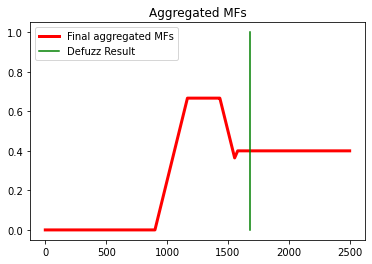

Tip (fuzzifying) =  16.776104056064536


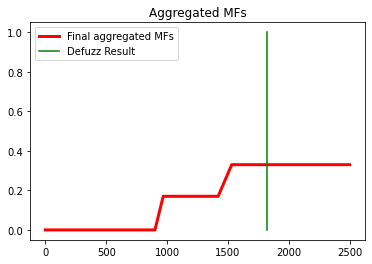

Tip (linguistic) =  18.19844172748839


18.19844172748839

In [ ]:
# 1. Input numeric values and use fuzzification route.
execFzzedRules(400,600)


# 2. Input linguistic valriables (e.g. wheighed through a poll)
# create test/hypothetical arrays of the 5 wheighs for each MF
# for each variable.
# a = np.array([0.0, 0.2, 0.8, 0.3, 0.2])
# b = np.array([0.1, 0.0, 0.8, 0.8, 0.3])

# 
a = np.array([0.0, 0.0, 0.17, 0.33, 0.50])
# 
b = np.array([0.0, 0.170, 0.17, 0.33, 0.33])


# and use the linguistic (no fuzzification) route
execLingRules(a,b)


# Tests
To compare with controller based version
(from original *tipping problem* demo)

**It works!** of course with some rounding differences as we use a different resolution (0-1000 instead of 0-10)

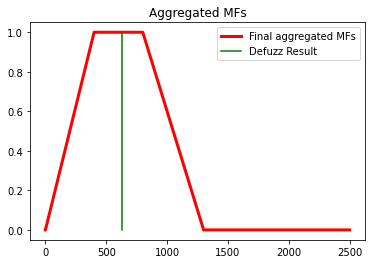

Tip (fuzzifying) =  6.294117647058824


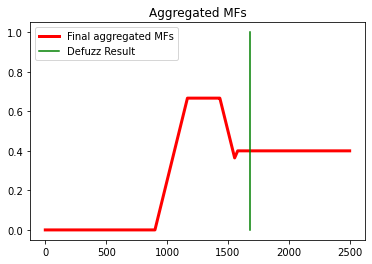

Tip (fuzzifying) =  16.776104056064536


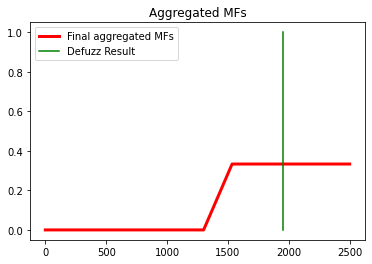

Tip (fuzzifying) =  19.562395020833144


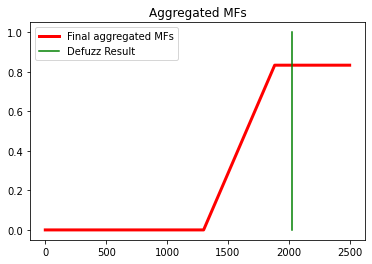

Tip (fuzzifying) =  20.302242917377143


20.302242917377143

In [ ]:
# Run the same values (here multiplied by 100) in the
# tipping problem demo using the controller libs.
execFzzedRules(0,0)

execFzzedRules(600,600)

execFzzedRules(700,800)

execFzzedRules(950,980)


# Now try your own experiments!

E.g.:

*   Create your polling input (or otherwise manage your data) to use direct linguistic variables
*   Change / adjust the MFs
etc...

